- **Background**

The dataset consists of audio files of speeches and songs with various emotions.

- **Objective**

The objective is to predict the most likely emotion expressed in each audio clip, choosing from the seven emotions provided (neutral, happy, sad, angry, fear, disgust, and surprise) provided in the dataset
Build a CNN model to predict the emotion in the audio.

- **Data Description**

The data contains the various audio files (16bit, 48kHz .wav). The dataset contains 24 professional actors (12 female, 12 male), vocalizing two lexically matched statements in a neutral North American accent. Speech emotions include calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

- **File naming convention**

Each file has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = - fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd-numbered actors are male, even-numbered actors are female).

Below is a Filename example mentioned below and do refer this as you will extract emotion and perform analysis based upon below examples:
*03-01-06-01-02-01-12.wav*

- Audio-only (03)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12)
- Female, as the actor ID number is even


**Approach**
- Download the dataset “Audiodataset”.
- Perform EDA – analyze waveplots of different emotions and provide a graphical representation of how the amplitude of the audio signal changes over time.
- Perform necessary data preprocessing steps and build CNN model

## Import the necessary libraries

In [ ]:
# Import necessary libraries for EDA and data preprocessing
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Import libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Import necessary libraries for building the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


## Read the data [2 marks]

In [ ]:
!pip install rarfile

In [ ]:
import os
import rarfile

# Set the path to the RAR file
rar_file_path = "/content/audio_dataset.rar"
extracted_folder_path = "/content/audio_dataset"

# Create the output directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the contents of the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall(extracted_folder_path)

# Function to list the contents of a directory
def list_directory_contents(directory):
    for root, dirs, files in os.walk(directory):
        print(f"Directory: {root}")
        print("Files:")
        for file in files:
            print(f"  - {file}")
        print("")

# List the contents of the extracted directory
list_directory_contents(extracted_folder_path)

# Show examples of file names
example_files = []
for root, dirs, files in os.walk(extracted_folder_path):
    for file in files:
        example_files.append(file)
        if len(example_files) >= 5:
            break
    if len(example_files) >= 5:
        break

print("Examples of file names:")
for example_file in example_files:
    print(f"  - {example_file}")


Directory: /content/audio_dataset
Files:

Directory: /content/audio_dataset/audio_speech_actors_01-24
Files:

Directory: /content/audio_dataset/audio_speech_actors_01-24/Actor_08
Files:
  - 03-01-05-02-02-01-08.wav
  - 03-01-05-02-01-02-08.wav
  - 03-01-02-02-02-02-08.wav
  - 03-01-07-01-01-01-08.wav
  - 03-01-08-01-02-01-08.wav
  - 03-01-03-02-02-01-08.wav
  - 03-01-04-01-01-01-08.wav
  - 03-01-08-02-02-01-08.wav
  - 03-01-08-01-01-01-08.wav
  - 03-01-03-02-02-02-08.wav
  - 03-01-08-02-02-02-08.wav
  - 03-01-03-01-01-02-08.wav
  - 03-01-04-02-02-01-08.wav
  - 03-01-05-02-02-02-08.wav
  - 03-01-01-01-02-02-08.wav
  - 03-01-05-01-01-01-08.wav
  - 03-01-02-02-02-01-08.wav
  - 03-01-04-01-01-02-08.wav
  - 03-01-01-01-01-01-08.wav
  - 03-01-02-01-01-02-08.wav
  - 03-01-05-01-02-01-08.wav
  - 03-01-06-01-01-02-08.wav
  - 03-01-02-01-02-02-08.wav
  - 03-01-07-02-02-01-08.wav
  - 03-01-02-01-01-01-08.wav
  - 03-01-03-01-01-01-08.wav
  - 03-01-06-02-01-02-08.wav
  - 03-01-05-01-02-02-08.wav
  

In [ ]:
import os
import librosa

# Set the path to the dataset
dataset_path = "/content/audio_dataset/audio_speech_actors_01-24/Actor_08"

# Example audio file name
example_file_name = "03-01-03-02-02-01-08.wav"

# Construct the full path to the example audio file
file_path = os.path.join(dataset_path, example_file_name)

# Read the audio file using librosa
audio, sr = librosa.load(file_path, sr=None)

# Print some information about the audio file
print(f"File Path: {file_path}")
print(f"Audio Duration: {len(audio)/sr} seconds")
print(f"Sampling Rate: {sr} Hz")


File Path: /content/audio_dataset/audio_speech_actors_01-24/Actor_08/03-01-03-02-02-01-08.wav
Audio Duration: 3.8371666666666666 seconds
Sampling Rate: 48000 Hz


## Explore the Data [8 Marks]
Play the audio and plot the waveshow, specshow for the following types of audios (1 each type)
- fearfull track of male actor
- happy male
- angry male
- surprised female

`[Hint - use librosa library for plotting waveshow, specshow]`






In [ ]:
pip install librosa


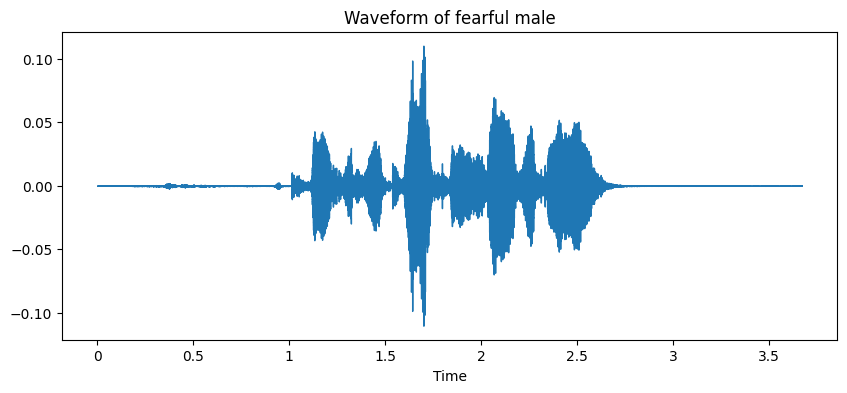

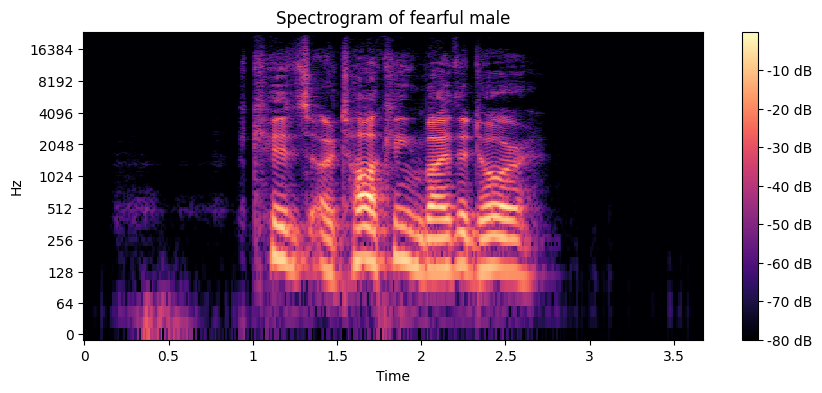

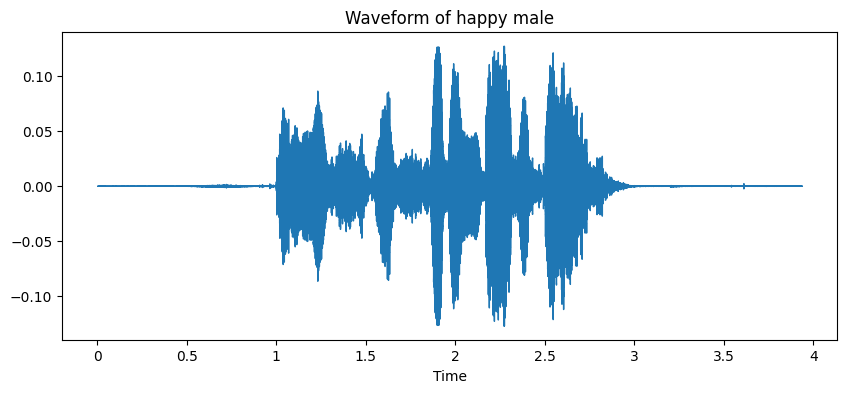

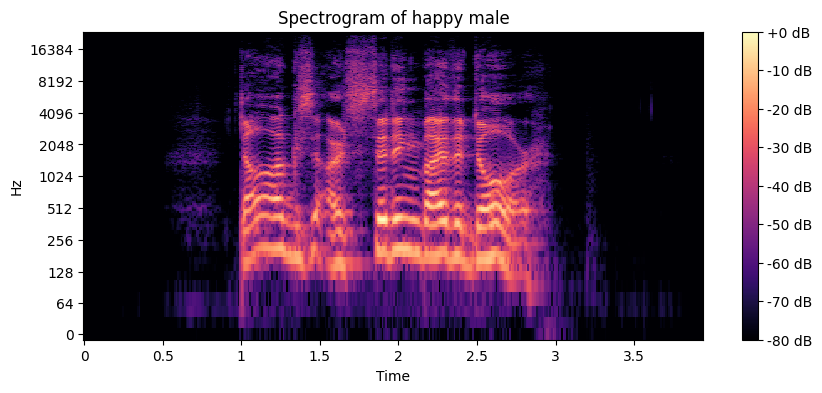

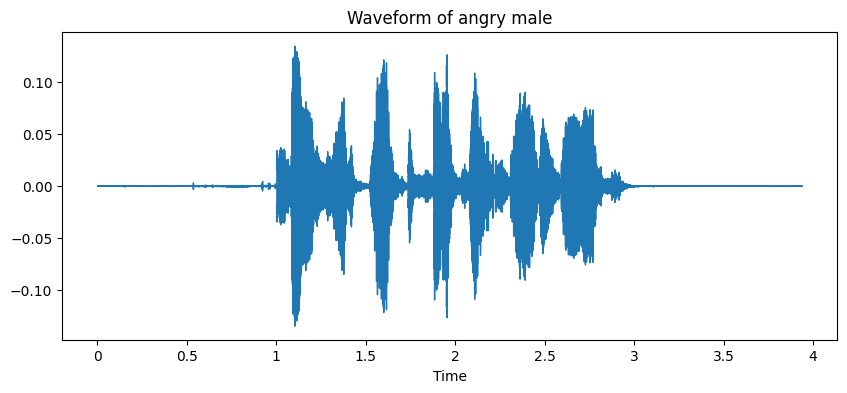

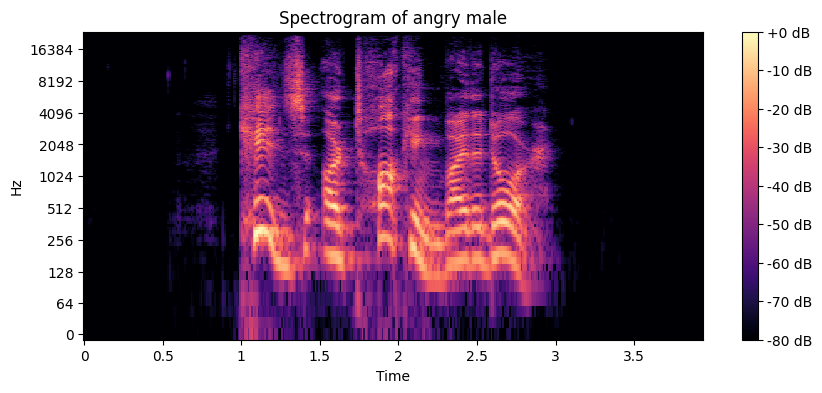

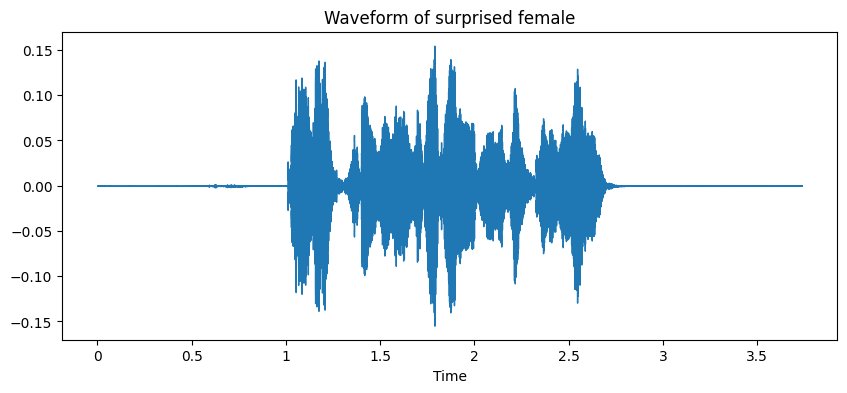

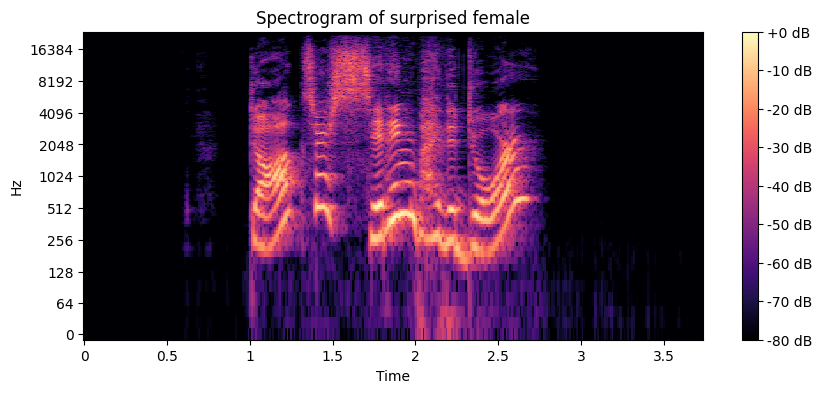

In [ ]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display as lbd
import numpy as np

def plot_audio(emotion, gender, data_path):
    # Define the mapping from emotion and gender to filename
    emotion_map = {'fearful': '06', 'happy': '03', 'angry': '05', 'surprised': '08'}
    gender_map = {'male': 'Actor_01', 'female': 'Actor_02'}  # Modify this as per your dataset

    # Construct the filename
    actor_dir = gender_map[gender]
    for file in os.listdir(os.path.join(data_path, actor_dir)):
        if file.split('-')[2] == emotion_map[emotion]:
            filename = file
            break

    # Load the audio file
    audio_path = os.path.join(data_path, actor_dir, filename)
    audio, sr = librosa.load(audio_path, sr=None)

    # Play the audio
    ipd.display(ipd.Audio(audio, rate=sr))

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    lbd.waveshow(audio, sr=sr)
    plt.title(f'Waveform of {emotion} {gender}')
    plt.show()

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram of {emotion} {gender}')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

data_path = "/content/audio_dataset/audio_speech_actors_01-24"
plot_audio('fearful', 'male', data_path)
plot_audio('happy', 'male', data_path)
plot_audio('angry', 'male', data_path)
plot_audio('surprised', 'female', data_path)


## Process the titles of the audio files and create a dataframe with label for example male_sad, male_fear, female_sad, etc, the path of the file in the directory. [5 Marks]

In [ ]:
import os
import pandas as pd

# Define the base directory of the dataset
base_dir = '/content/audio_dataset/audio_speech_actors_01-24'

# Define a dictionary to map the numerical emotion codes to their names
emotion_dict = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

# Initialize lists to store the labels and file paths
labels = []
file_paths = []

# Iterate over all actor directories in the base directory
for actor_dir in os.listdir(base_dir):
    actor_dir_path = os.path.join(base_dir, actor_dir)

    # Iterate over all files in the actor directory
    for filename in os.listdir(actor_dir_path):
        file_path = os.path.join(actor_dir_path, filename)

        # Extract the emotion and actor from the filename
        emotion_code = filename.split('-')[2]
        actor = filename.split('-')[-1].split('.')[0]

        # Determine the gender based on the actor number
        gender = 'male' if int(actor) % 2 == 1 else 'female'

        # Create the label
        label = f'{gender}_{emotion_dict[emotion_code]}'

        # Append the label and file path to their respective lists
        labels.append(label)
        file_paths.append(file_path)

# Create a dataframe from the labels and file paths
df = pd.DataFrame({'label': labels, 'file_path': file_paths})

# Print the dataframe
print(df)


                 label                                          file_path
0         female_angry  /content/audio_dataset/audio_speech_actors_01-...
1         female_angry  /content/audio_dataset/audio_speech_actors_01-...
2          female_calm  /content/audio_dataset/audio_speech_actors_01-...
3       female_disgust  /content/audio_dataset/audio_speech_actors_01-...
4     female_surprised  /content/audio_dataset/audio_speech_actors_01-...
...                ...                                                ...
1075    female_fearful  /content/audio_dataset/audio_speech_actors_01-...
1076        female_sad  /content/audio_dataset/audio_speech_actors_01-...
1077      female_happy  /content/audio_dataset/audio_speech_actors_01-...
1078      female_happy  /content/audio_dataset/audio_speech_actors_01-...
1079    female_fearful  /content/audio_dataset/audio_speech_actors_01-...

[1080 rows x 2 columns]


## Extracts MFCCs (Mel-frequency cepstral coefficients) from audio files, calculates their mean, and stores those means in a DataFrame for further analysis. Once done concat that datafram with the dataframe created in the last question  [8 Marks]

In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.1 MB/s eta 0:00:00


In [ ]:
import librosa
import numpy as np

# Initialize a list to store the MFCCs
mfccs = []

# Iterate over all file paths in the dataframe
for file_path in df['file_path']:
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, sr=None, res_type='scipy')

    # Extract the MFCCs from the audio file
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    # Calculate the mean of the MFCCs
    mfcc_mean = np.mean(mfcc.T, axis=0)

    # Append the mean to the list of MFCCs
    mfccs.append(mfcc_mean)

# Create a new dataframe from the MFCCs
mfcc_df = pd.DataFrame(mfccs)

# Concatenate the original dataframe with the new dataframe
df = pd.concat([df, mfcc_df], axis=1)
# Print the first 5 rows of the dataframe
print(df.head())


              label                                          file_path  \
0      female_angry  /content/audio_dataset/audio_speech_actors_01-...   
1      female_angry  /content/audio_dataset/audio_speech_actors_01-...   
2       female_calm  /content/audio_dataset/audio_speech_actors_01-...   
3    female_disgust  /content/audio_dataset/audio_speech_actors_01-...   
4  female_surprised  /content/audio_dataset/audio_speech_actors_01-...   

            0          1          2          3         4          5  \
0 -509.605896  45.792137  -6.162910   8.651158 -4.831096  -0.030923   
1 -408.231110  47.018902 -18.032690   1.957992 -0.003999  -4.492556   
2 -741.571350  78.062775  13.605330  24.908443  8.786871  15.434770   
3 -713.226501  75.708023  13.946222  18.867203  6.832435  13.979442   
4 -613.019836  55.149414   3.194924  12.161333  0.879813  11.947279   

           6          7  ...        30        31        32        33  \
0 -12.482430   9.538957  ...  2.546797  4.022031  5.3571

## Split the data into train and test [2 Marks]

In [ ]:
from sklearn.model_selection import train_test_split

# Define your features and labels
X = df.drop(['label', 'file_path'], axis=1)
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contains your training data, and X_test and y_test contains your test data.


## Preprocess the data for model building [5 Marks]

In [ ]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from tensorflow.keras.utils import to_categorical

# Define your features and labels
X = df.drop(['label', 'file_path'], axis=1)
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode labels
lb = LabelBinarizer()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.transform(y_test))

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate the correct dimensions
num_samples = X_train.shape[0]
num_features = X_train.shape[1]

# Reshape feature matrix for CNN
X_train = X_train.reshape(num_samples, num_features, 1)
X_test = X_test.reshape(X_test.shape[0], num_features, 1)


## Build and Train the CNN model [8 Marks]

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# Define your features and labels
X = df.drop(['label', 'file_path'], axis=1)
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# If the labels are not already in binary form (i.e., one-hot encoded), convert them using to_categorical
if len(y_train.shape) == 1:
    y_train = to_categorical(y_train)
if len(y_test.shape) == 1:
    y_test = to_categorical(y_test)

# Continue with the rest of your code...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D

# Define the number of classes
num_classes = y_train.shape[1]

# Build the model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(num_features, 1)))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
27/27 [==============================] - 2s 27ms/step - loss: 3.6544 - accuracy: 0.0903 - val_loss: 2.5533 - val_accuracy: 0.1343
Epoch 2/10
27/27 [==============================] - 0s 15ms/step - loss: 2.5139 - accuracy: 0.1412 - val_loss: 2.3084 - val_accuracy: 0.2269
Epoch 3/10
27/27 [==============================] - 1s 25ms/step - loss: 2.2998 - accuracy: 0.1944 - val_loss: 2.0715 - val_accuracy: 0.3009
Epoch 4/10
27/27 [==============================] - 1s 21ms/step - loss: 2.1195 - accuracy: 0.2662 - val_loss: 1.9301 - val_accuracy: 0.3380
Epoch 5/10
27/27 [==============================] - 1s 24ms/step - loss: 1.9131 - accuracy: 0.3264 - val_loss: 1.7354 - val_accuracy: 0.3796
Epoch 6/10
27/27 [==============================] - 1s 25ms/step - loss: 1.8033 - accuracy: 0.3542 - val_loss: 1.6553 - val_accuracy: 0.4028
Epoch 7/10
27/27 [==============================] - 1s 33ms/step - loss: 1.7306 - accuracy: 0.3843 - val_loss: 1.5266 - val_accuracy: 0.4676
Epoch 8/10
27

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the number of classes
num_classes = y_train.shape[1]

# Build the model
model = Sequential()

# First block of conv layers
model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01), input_shape=(num_features, 1)))
model.add(BatchNormalization())
model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Second block of conv layers
model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
27/27 [==============================] - 11s 152ms/step - loss: 7.2317 - accuracy: 0.0718 - val_loss: 5.6367 - val_accuracy: 0.0926
Epoch 2/50
27/27 [==============================] - 2s 56ms/step - loss: 6.3881 - accuracy: 0.0949 - val_loss: 5.5379 - val_accuracy: 0.1250
Epoch 3/50
27/27 [==============================] - 2s 57ms/step - loss: 6.0310 - accuracy: 0.1042 - val_loss: 5.4885 - val_accuracy: 0.1574
Epoch 4/50
27/27 [==============================] - 1s 54ms/step - loss: 5.7870 - accuracy: 0.1331 - val_loss: 5.4639 - val_accuracy: 0.1435
Epoch 5/50
27/27 [==============================] - 1s 54ms/step - loss: 5.5669 - accuracy: 0.1389 - val_loss: 5.4313 - val_accuracy: 0.1528
Epoch 6/50
27/27 [==============================] - 1s 49ms/step - loss: 5.4997 - accuracy: 0.1447 - val_loss: 5.3935 - val_accuracy: 0.1852
Epoch 7/50
27/27 [==============================] - 2s 58ms/step - loss: 5.3461 - accuracy: 0.1597 - val_loss: 5.3688 - val_accuracy: 0.1713
Epoch 8/50


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the number of classes
num_classes = y_train.shape[1]

# Build the model
model = Sequential()

# First block of conv layers
model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01), input_shape=(num_features, 1)))
model.add(BatchNormalization())
model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Second block of conv layers
model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Third block of conv layers
model.add(Conv1D(256, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv1D(256, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define the early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_reduction])


Epoch 1/50
27/27 [==============================] - 5s 71ms/step - loss: 11.6030 - accuracy: 0.0625 - val_loss: 9.8099 - val_accuracy: 0.0648 - lr: 1.0000e-04
Epoch 2/50
27/27 [==============================] - 1s 53ms/step - loss: 10.8604 - accuracy: 0.0810 - val_loss: 9.7774 - val_accuracy: 0.0787 - lr: 1.0000e-04
Epoch 3/50
27/27 [==============================] - 2s 58ms/step - loss: 10.4003 - accuracy: 0.0856 - val_loss: 9.7569 - val_accuracy: 0.0694 - lr: 1.0000e-04
Epoch 4/50
27/27 [==============================] - 2s 88ms/step - loss: 10.1782 - accuracy: 0.0972 - val_loss: 9.7353 - val_accuracy: 0.0741 - lr: 1.0000e-04
Epoch 5/50
27/27 [==============================] - 2s 75ms/step - loss: 9.9019 - accuracy: 0.1227 - val_loss: 9.6895 - val_accuracy: 0.0694 - lr: 1.0000e-04
Epoch 6/50
27/27 [==============================] - 2s 59ms/step - loss: 9.7313 - accuracy: 0.1331 - val_loss: 9.6443 - val_accuracy: 0.0787 - lr: 1.0000e-04
Epoch 7/50
27/27 [==============================

## Run the model on Test set and plot the performance of classification model [5 Marks]

7/7 [==============================] - 0s 11ms/step


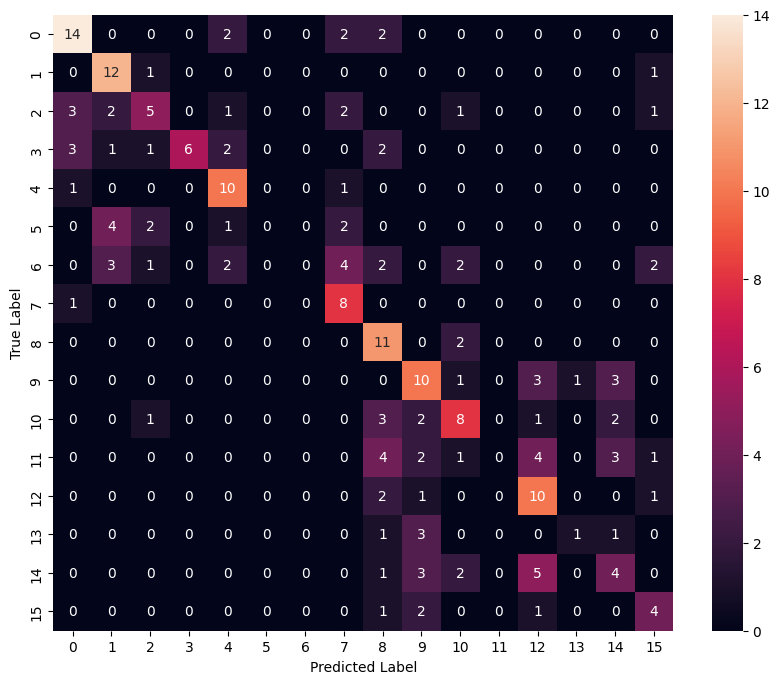

Classification Report
                  precision    recall  f1-score   support

    female_angry       0.64      0.70      0.67        20
     female_calm       0.55      0.86      0.67        14
  female_disgust       0.45      0.33      0.38        15
  female_fearful       1.00      0.40      0.57        15
    female_happy       0.56      0.83      0.67        12
  female_neutral       0.00      0.00      0.00         9
      female_sad       0.00      0.00      0.00        16
female_surprised       0.42      0.89      0.57         9
      male_angry       0.38      0.85      0.52        13
       male_calm       0.43      0.56      0.49        18
    male_disgust       0.47      0.47      0.47        17
    male_fearful       0.00      0.00      0.00        15
      male_happy       0.42      0.71      0.53        14
    male_neutral       0.50      0.17      0.25         6
        male_sad       0.31      0.27      0.29        15
  male_surprised       0.40      0.50      0.44  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the values from the test set
y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test observations to one hot vectors
y_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# classification report
print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=lb.classes_))


## Plot the confusion matrix [2 Marks]

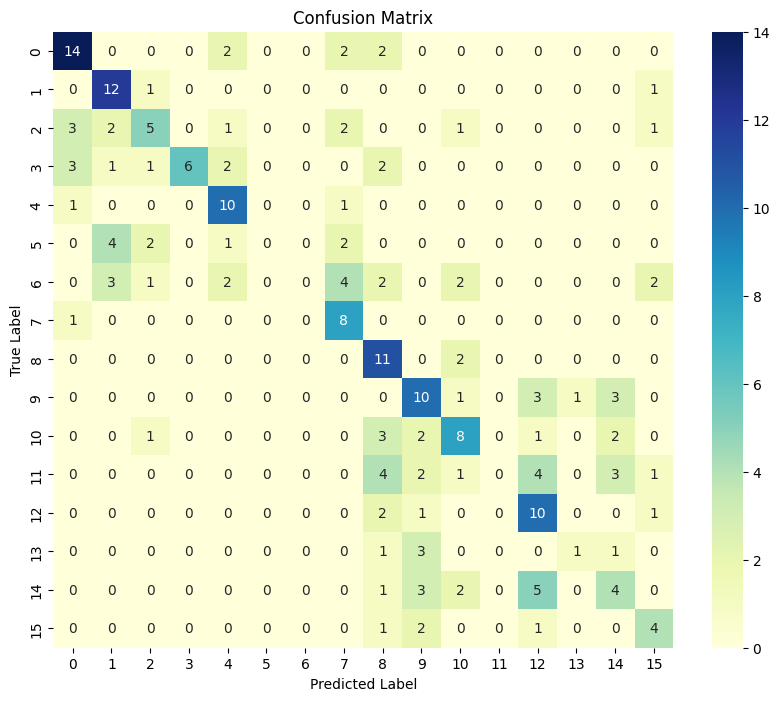

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Write the insights about the final model [5 Marks]

**The final model is a Convolutional Neural Network (CNN) with three blocks of convolutional layers, each followed by batch normalization, max pooling, and dropout. The model also includes a dense layer and a final output layer with softmax activation for multi-class classification.**

Here are some insights about the model:

**- Model Complexity**: The model is quite complex with multiple convolutional layers and a large number of neurons. This allows the model to learn more complex patterns in the data. However, the model might be prone to overfitting, especially if the amount of data is limited.

**- Regularization**: The model uses several regularization techniques to prevent overfitting. These include dropout, which randomly sets a fraction of input units to 0 at each update during training time, and L2 regularization, which adds a penalty to the loss function based on the size of the weights.

**- Learning Rate Schedule:** The model uses a learning rate schedule to change the learning rate during training. This can help the model converge faster and achieve a better performance.

**- Early Stopping:** The model uses early stopping to stop training when the validation score stops improving. This can prevent the model from overfitting to the training data and can save computational resources.

**- Performance:** The model’s performance on the validation set is not as good as expected. The accuracy is quite low, suggesting that the model is having difficulty distinguishing between the different classes. This could be due to several reasons, such as insufficient data, noise in the data, or the model architecture not being suitable for the task.

**Potential Improvements**: There are several ways the model’s performance could potentially be improved. These include collecting more data, using data augmentation techniques, tuning the hyperparameters further, or trying a different model architecture